1. 부산기온 데이터 수집

2. 부산에서 가장 더웠던 날은?

3. 매년 크리스마스에 최고 기온과 최저 기온 추이 : plot

4. 월별 기온 데이터 추이 : boxplot

In [1]:
!pip install matplotlib

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20220921112104.csv' , header=6 , encoding='utf-8')
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1904-04-09,159,11.3,7.8,16.1
1,1904-04-10,159,9.3,4.7,15.2
2,1904-04-11,159,10.6,NaN,14.9
3,1904-04-12,159,11.3,8.8,13.4
4,1904-04-13,159,14.5,11.1,16.9


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43264 entries, 0 to 43263
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       43264 non-null  object 
 1   지점       43264 non-null  int64  
 2   평균기온(℃)  43264 non-null  float64
 3   최저기온(℃)  43254 non-null  float64
 4   최고기온(℃)  43260 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.7+ MB


In [15]:
df.describe()

,159,11.3,7.8,16.1
count,43263.0,43263.000000,43253.000000,43259.000000
mean,159.0,14.168116,10.819388,18.437250
std,0.0,8.325170,8.856725,8.106519
min,159.0,-11.300000,-14.000000,-8.200000
25%,159.0,7.500000,3.600000,12.000000
50%,159.0,15.100000,11.600000,19.500000
75%,159.0,20.900000,18.200000,24.900000
max,159.0,31.700000,28.300000,37.300000


In [19]:
df.isnull().sum()

날짜          0
지점          0
평균기온(℃)     0
최저기온(℃)    10
최고기온(℃)     4
dtype: int64

In [22]:
df[df['최고기온(℃)'].isnull()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
9,1904-04-18,159,11.7,9.0,NaN
11,1904-04-20,159,11.9,NaN,NaN
22961,1967-02-19,159,2.7,NaN,NaN
25392,1973-10-16,159,15.9,NaN,NaN


In [23]:
df[df['최저기온(℃)'].isnull()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
2,1904-04-11,159,10.6,NaN,14.9
8,1904-04-17,159,10.3,NaN,12.6
11,1904-04-20,159,11.9,NaN,NaN
12,1904-04-21,159,12.1,NaN,18.3
17,1904-04-26,159,14.5,NaN,17.6
28,1904-05-07,159,16.1,NaN,21.9
37,1904-05-16,159,16.3,NaN,21.1
40,1904-05-19,159,16.3,NaN,22.8
22961,1967-02-19,159,2.7,NaN,NaN
25392,1973-10-16,159,15.9,NaN,NaN


In [27]:
df=df.dropna()
df.isnull().sum()

날짜    0
지점    0
평균    0
최저    0
최고    0
dtype: int64

In [28]:
df.columns=['날짜', '지점', '평균', '최저', '최고']
df.head()

,날짜,지점,평균,최저,최고
0,1904-04-09,159,11.3,7.8,16.1
1,1904-04-10,159,9.3,4.7,15.2
3,1904-04-12,159,11.3,8.8,13.4
4,1904-04-13,159,14.5,11.1,16.9
5,1904-04-14,159,9.4,8.6,16.0


In [29]:
df.sort_values(by='최고', ascending=False)

,날짜,지점,평균,최저,최고
41035,2016-08-14,159,31.7,28.3,37.3
28971,1983-08-04,159,30.8,26.5,36.7
41036,2016-08-15,159,29.4,25.3,36.6
41756,2018-08-05,159,31.3,28.1,36.4
41392,2017-08-06,159,31.7,27.6,36.2
...,...,...,...,...,...
26560,1976-12-27,159,-8.4,-11.5,-5.3
28082,1981-02-26,159,-7.9,-10.4,-5.7
3932,1915-01-14,159,-8.9,-12.7,-5.8
10519,1933-01-26,159,-8.5,-9.7,-6.2


In [34]:
day, high = df.loc[41035,['날짜','최고']]
print(f'부산에서 가장 더웠던날 {day}: {high}도')

부산에서 가장 더웠던날 2016-08-14: 37.3도


In [35]:
df['날짜'] = df['날짜'].astype('datetime64')

In [36]:
df['년']= df['날짜'].dt.year
df['월']= df['날짜'].dt.month
df['일']= df['날짜'].dt.day

In [37]:
christmas_df = df[(df['월'] == 12) & (df['일'] ==25)]
christmas_df.head()

,날짜,지점,평균,최저,최고,년,월,일
260,1904-12-25,159,2.5,-1.5,7.7,1904,12,25
625,1905-12-25,159,11.6,10.5,14.8,1905,12,25
990,1906-12-25,159,0.3,-4.8,3.8,1906,12,25
1355,1907-12-25,159,9.1,5.3,13.9,1907,12,25
1721,1908-12-25,159,3.8,-0.6,9.1,1908,12,25


In [40]:
christmas_df = christmas_df[['년', '최고', '최저']]
christmas_df.head()

,년,최고,최저
260,1904,7.7,-1.5
625,1905,14.8,10.5
990,1906,3.8,-4.8
1355,1907,13.9,5.3
1721,1908,9.1,-0.6


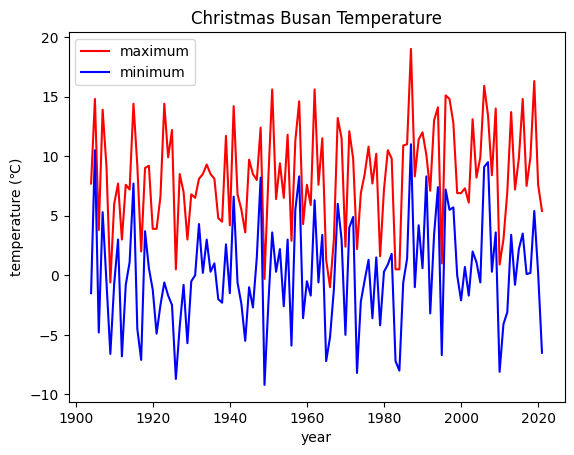

In [42]:
plt.title('Christmas Busan Temperature')
plt.plot(christmas_df['년'],christmas_df['최고'], color='r', label='maximum' )
plt.plot(christmas_df['년'],christmas_df['최저'], color='b', label='minimum' )
plt.xlabel('year')
plt.ylabel('temperature (℃)')
plt.legend()
plt.show()

In [43]:
df.head()

,날짜,지점,평균,최저,최고,년,월,일
0,1904-04-09,159,11.3,7.8,16.1,1904,4,9
1,1904-04-10,159,9.3,4.7,15.2,1904,4,10
3,1904-04-12,159,11.3,8.8,13.4,1904,4,12
4,1904-04-13,159,14.5,11.1,16.9,1904,4,13
5,1904-04-14,159,9.4,8.6,16.0,1904,4,14


In [46]:
# df.loc[df['월'] == 1,'평균']

267      2.2
268      5.8
269      7.0
270      7.9
271      8.7
        ... 
43027    6.3
43028    4.7
43029    3.3
43030    3.2
43031    3.6
Name: 평균, Length: 3658, dtype: float64

In [55]:
month_list=[]

for n in range(1,13):
    month_list.append(df.loc[df['월'] == n,'평균'])

# month_list[0]
# type(month_list)

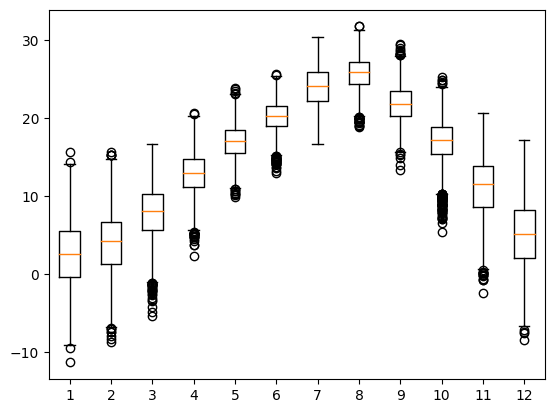

In [52]:
plt.boxplot(month_list)
plt.show()